In [74]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
%matplotlib inline

# Parts 1 and 2 - Setup

Here, I download and import the High Time Resolution Universe Survey (HTRU) dataset using Pandas. I decided to analyze the first four features from the integrated pulse profile, and the dataframe columns are renamed to indicate as such (indices 0 through 3 in the dictionary below; index 8, "IsReal," denotes the class of the data - RFI/noise (class 0) and real pulsar (class 1)).

In [75]:
dir =  "HTRU_2.csv"
df = pd.read_csv(dir, header=None)
df.rename(columns = {0:"Mean", 1:"STD", 2:"Kurtosis", 3:"Skewness", 8:"IsReal"}, inplace=True)
display(df)

,Mean,STD,Kurtosis,Skewness,4,5,6,7,IsReal
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [76]:
#Save and name the subsets of the data that contain background noise (noise_data) and actual pulsar detections (real_data).
noise_data = df.loc[df["IsReal"] == 0]
real_data = df.loc[df["IsReal"] == 1]

# Part 3 - Comparing the Shape of Each Feature Between the Two Classes

There are 4 separate analyses below: one for each of the features of the integrated profile; i.e., mean, standard deviation ("STD"), kurtosis, and skewness. 
On each plot is shown a separate histogram for the noise data and the real data with 40 bins for each distinct histogram. A legend is shown in the upper right-hand corner of each of these plots that indicates 
the colors corresponding to each dataset in addition to the mean and standard deviation calculated for each of these two distributions.

Text(0, 0.5, 'Density')

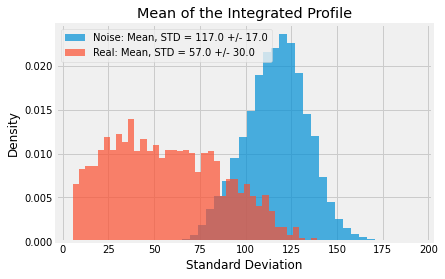

In [77]:
# Histograms of the mean of the integrated profile for both noise and real data.
plt.hist(noise_data["Mean"], density=True, bins=40, alpha=0.7, label="Noise: Mean, STD = " + str(round(noise_data["Mean"].mean(), 0)) + " +/- " + str(round(noise_data["Mean"].std(), 0)));
plt.hist(real_data["Mean"], density=True, bins=40, alpha=0.7, label="Real: Mean, STD = " + str(round(real_data["Mean"].mean(), 0)) + " +/- " + str(round(real_data["Mean"].std(), 0)));
plt.title("Mean of the Integrated Profile")
plt.legend()
plt.xlabel("Standard Deviation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

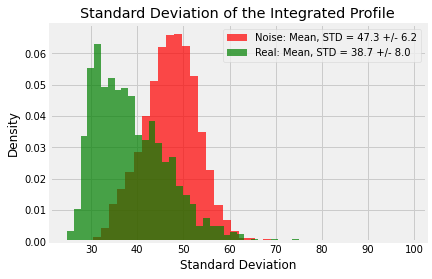

In [78]:
# Histograms of the standard deviation of the integrated profile for both noise and real data.
plt.hist(noise_data["STD"], density=True, bins=40, alpha=0.7, color="red", label="Noise: Mean, STD = " + str(round(noise_data["STD"].mean(), 1)) + " +/- " + str(round(noise_data["STD"].std(), 1)));
plt.hist(real_data["STD"], density=True, bins=40, alpha=0.7, color="green", label="Real: Mean, STD = " + str(round(real_data["STD"].mean(), 1)) + " +/- " + str(round(real_data["STD"].std(), 1)));
plt.title("Standard Deviation of the Integrated Profile")
plt.legend()
plt.xlabel("Standard Deviation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

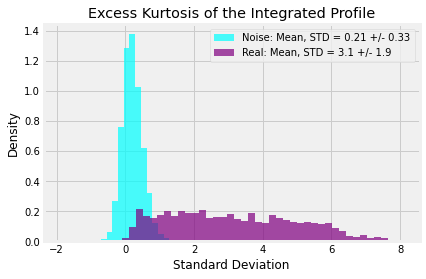

In [79]:
# Histograms of the excess kurtosis of the integrated profile for both noise and real data.
plt.hist(noise_data["Kurtosis"], density=True, bins=40, alpha=0.7, color="cyan", label="Noise: Mean, STD = " + str(round(noise_data["Kurtosis"].mean(), 2)) + " +/- " + str(round(noise_data["Kurtosis"].std(), 2)));
plt.hist(real_data["Kurtosis"], density=True, bins=40, alpha=0.7, color="purple", label="Real: Mean, STD = " + str(round(real_data["Kurtosis"].mean(), 1)) + " +/- " + str(round(real_data["Kurtosis"].std(), 1)));
plt.title("Excess Kurtosis of the Integrated Profile")
plt.legend()
plt.xlabel("Standard Deviation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

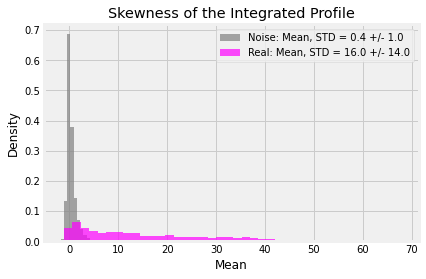

In [80]:
# Histograms of the skewness of the integrated profile for both noise and real data.
plt.hist(noise_data["Skewness"], density=True, bins=40, alpha=0.7, color="gray", label="Noise: Mean, STD = " + str(round(noise_data["Skewness"].mean(), 1)) + " +/- " + str(round(noise_data["Skewness"].std(), 1)));
plt.hist(real_data["Skewness"], density=True, bins=40, alpha=0.7, color="magenta", label="Real: Mean, STD = " + str(round(real_data["Skewness"].mean(), 0)) + " +/- " + str(round(real_data["Skewness"].std(), 0)));
plt.title("Skewness of the Integrated Profile")
plt.legend()
plt.xlabel("Mean")
plt.ylabel("Density")

# Part 4 - Computation of Probabilities

Here, we calculate various probabilities of interest to us by comparing our noise and real data sets. The following are what we wish to find:

$P(A)$:  The probability that an observation is a pulsar candidate. \
$P(B)$:  The probability that the mean of the integrated profile of an observation is less than 80. \
$P(A \cap B)$:  The intersection, or the probability that both of the above hold true.

In [81]:
#Calculate the probability that an observation is a pulsar candidate, P(A). In other words, if an observation from the HTRU dataset
#is chosen at random, what is the probability that it is a real pulsar?
#This is just the number of real data points divided by the total number of data points.
pA = len(real_data) / (len(df))
print("pA: ", pA)

#Calculate the probability that an observation with mean of the integrated profile < 80, P(B).
#This is given by the number of data points divided by the total number of data points.
mean = df["Mean"]
pB =  len(mean[mean < 80]) / len(df)
print("pB: ", pB)

#Calculate the probability that an observation satisfies both conditions, P(A ⋂ B).
#This is given by the number of data points that are both real and have the mean of the integrated profile less than 80 divided by the total number of data points.
pC =  len(df[(mean < 80) & (df["IsReal"] == 1)]) / len(df)
print("pC: ", pC)

pA:  0.09157447759526204
pB:  0.08626662196893507
pC:  0.06900212314225053


# Part 5 - Computation of Probabilities Using Bayes' Theorem

Here, we use Bayes' Theorem to compute the following: \
The probability that a given observation is a pulsar candidate given that the mean of the integrated profile is less than 80. Per Bayes' theorem, this is given by $P(\text{real } | \text{ mean} < 80) = \frac{P(A \cap B)}{P(B)}$. \
The probability that the mean of the integrated profile is less than 80 given that the data point if a pulsar candidate. Per Bayes' theorem, this is given by $P(\text{mean} < 80 \ | \text{ real}) = \frac{P(A \cap B)}{P(A)}$.

In [82]:
#Calculate the first conditional probability - P(real | mean < 80).
pD = pC / pB
print("pD: ", pD)

#Calculate the second conditional probability - P(mean < 80 | real).
pE = pC / pA
print("pE: ", pE)

pD:  0.7998704663212436
pE:  0.7535082367297132


# Part 6 - The Standard Normal Distribution

Here, we integrate the normal distribution to find the cumulative probabilities associated with various Z-scores. First, let us calculate the cumulative probabilities from the mean for Z-scores of 1, 3, and 5. In this case, we need to use stats.norm's cdf (cumulative distribution function) to calculate the cumulative probability, then subtract off the left half of the tail:

In [83]:
#Cumulative probability from mean for Z = 1.
cum_mean_z1 = norm.cdf(1)-0.5
print("cum_mean_z1: ", cum_mean_z1)

#Cumulative probability from mean for Z = 3.
cum_mean_z3 = norm.cdf(3)-0.5
print("cum_mean_z3: ", cum_mean_z3)

#Cumulative probability from mean for Z = 5.
cum_mean_z5 = norm.cdf(5)-0.5
print("cum_mean_z5: ", cum_mean_z5)

cum_mean_z1:  0.3413447460685429
cum_mean_z3:  0.4986501019683699
cum_mean_z5:  0.4999997133484281


Now let us do the same process for the total cumulative probability, where we do not have to subtract off the tails. Thus, we just add 50% of the standard normal distribution back in:

In [84]:
#Cumulative probabaility for Z = 1.
print("cum_z1: ", cum_mean_z1+0.5)

#Cumulative probabaility for Z = 3.
print("cum_z3: ", cum_mean_z3+0.5)

#Cumulative probabaility for Z = 5.
print("cum_z5: ", cum_mean_z5+0.5)

cum_z1:  0.8413447460685429
cum_z3:  0.9986501019683699
cum_z5:  0.9999997133484281


Finally, let us look at the complementary cumulative probabilities. In this case, we can just subtract each of the cumulative probabilities from 1 to get their complements:

In [85]:
#Complementary cumulative probabaility for Z = 1.
print("cum_comp_z1: ", 1-(cum_mean_z1+0.5))

#Complementary cumulative probabaility for Z = 3.
print("cum_comp_z3: ", 1-(cum_mean_z3+0.5))
 
#Complementary cumulative probabaility for Z = 5.
print("cum_comp_z5: ", 1-(cum_mean_z5+0.5))

cum_comp_z1:  0.15865525393145707
cum_comp_z3:  0.0013498980316301035
cum_comp_z5:  2.866515719235352e-07


### P values
Finally, suppose we want to find the p-value corresponding to the Higgs discovery result from the ATLAS experiment, which has a Z-score of 5.9. We can use the complementary cumulative probability to do so:

In [86]:
#Z-score of the Higgs discovery.
cum_mean_z5_9 = norm.cdf(5.9)
print("5.9 sigma p value: ", 1-(cum_mean_z5_9))

5.9 sigma p value:  1.8175078109194942e-09
